## Salary Prediction using Linear Regression and Gradient Descent
In this project, i implement a simple linear regression model from scratch to predict salaries based on years of experience. We use gradient descent to optimize the model and visualize the results.(i added the same code in the end using scikit-learn)


In [7]:
import pandas as pd #for the data
import matplotlib.pyplot as plt #for visulisation


In [9]:
#loading the data
data = pd.read_csv('/home/oubaid/Desktop/ml/archive/Salary_Data.csv')

In [15]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Dataset Overview
The dataset contains two columns:
- `YearsExperience`: The number of years of professional experience.
- `Salary`: The salary of the employee (scaled down by a factor of 122391 for easier computation).

In [18]:
data['Salary'] = data['Salary'] / 12000

## Data Visualization
Below is the scatter plot of years of experience vs. salary before applying the regression model.

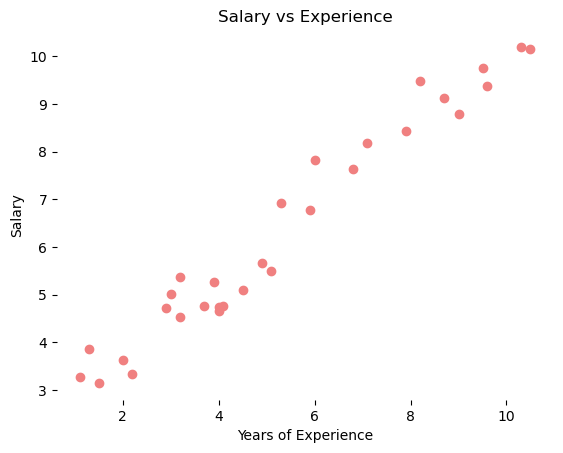

In [20]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()


## Cost Function
The cost function calculates the difference between the predicted and actual salaries, squared, and averaged over all data points.

Mean Squared Error (MSE) Formula
The MSE is calculated as:
![alternative text](/home/oubaid/Desktop/ml/archive/mse_formula.webp)
![Alt Text](attachment:/home/oubaid/Desktop/ml/archive/mse_formula.webp)
with ŷ=wx+b 
We aim to minimize this cost function.


In [49]:
def cost(w, b, ds):
    TE = 0
    for i in range(len(ds)):
        x = ds.iloc[i].YearsExperience
        y = ds.iloc[i].Salary
        TE += (y - (w * x + b)) ** 2  
    return TE / float(len(ds))  

## Gradient Descent
Gradient descent is an optimization algorithm used to adjust the slope (`w`) and intercept (`b`) iteratively by computing the gradient of the cost function. This helps to find the best fit for the line.
in other words Gradient descent find the best (`w`,`b`) that minimises the cost function

In [53]:
def gradient_descent(m, b, ds, l):
    m1 = 0
    b1 = 0
    n = len(ds)
    for i in range(n):
        x = ds.iloc[i].YearsExperience
        y = ds.iloc[i].Salary
    
        m1 += -(2/n) * x * (y - (m * x + b)) 
        b1 += -(2/n) * (y - (m * x + b))      #partial derivative of the cost function
    m = m - m1 * l
    b = b - b1 * l
    return m, b

now i will run gradient descent for 10,000 epochs. 

In [64]:

# Initialize parameters
w = 0
b = 0
l = 0.01 #the learning rate 
epochs = 10000

# Perform gradient descent
for i in range(epochs):
    w, b = gradient_descent(w, b, data, l)
    if i % 1000 == 0: 
        print(f'Epoch {i}: Cost = {cost(w, b, data)}')


print(f'Final slope (m): {w}, intercept (b): {b}')


Epoch 0: Cost = 4.135231842766919
Epoch 1000: Cost = 0.21733555916425018
Epoch 2000: Cost = 0.21715942357047305
Epoch 3000: Cost = 0.21715938696789247
Epoch 4000: Cost = 0.21715938696028597
Epoch 5000: Cost = 0.21715938696028428
Epoch 6000: Cost = 0.21715938696028456
Epoch 7000: Cost = 0.2171593869602844
Epoch 8000: Cost = 0.21715938696028442
Epoch 9000: Cost = 0.21715938696028442
Final slope (m): 0.7874968601212642, intercept (b): 2.149350016555672


## Final Model Visualization
Here, we visualize the learned linear regression line over the data points after running gradient descent.

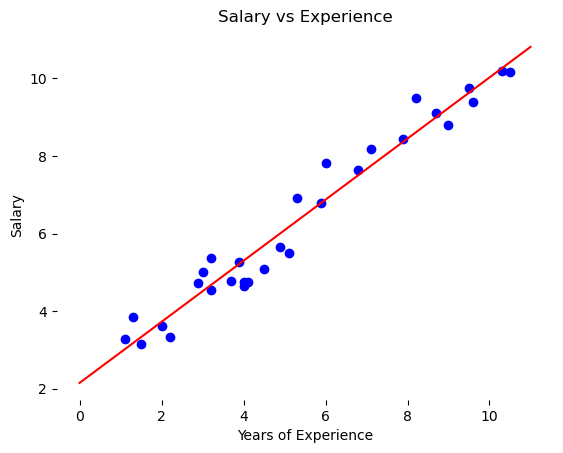

In [75]:

plt.scatter(data['YearsExperience'], data['Salary'], color = 'blue')
plt.plot(list(range(0, 12)), [w * x + b for x in range(0, 12)], color="red")
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

### the same model using scikit-learn

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [84]:
data = pd.read_csv('/home/oubaid/Desktop/ml/archive/Salary_Data.csv')
X = data[['YearsExperience']]
y = data['Salary']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 49830096.85590839


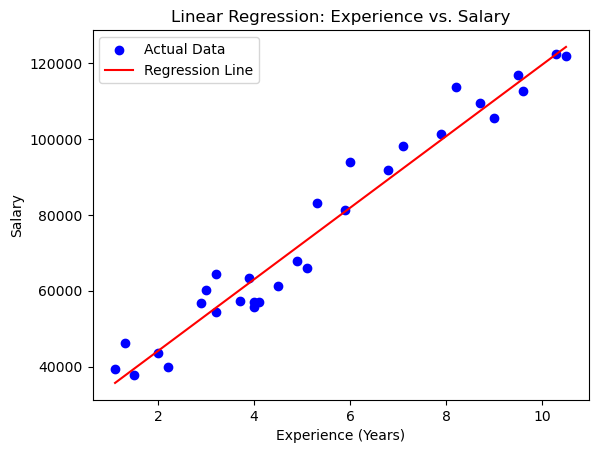

In [88]:
plt.scatter(X, y, color='blue', label='Actual Data')


plt.plot(X, model.predict(X), color='red', label='Regression Line')


plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Linear Regression: Experience vs. Salary')


plt.legend()

plt.show()

## References
- [Gradient Descent Algorithm](https://en.wikipedia.org/wiki/Gradient_descent)
- [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
